### Bernoulli

In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score

In [5]:
dataset = pd.read_csv('../0_datasets/census.csv')
dataset.head()

,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [6]:
dataset['sex'].unique()

array([' Male', ' Female'], dtype=object)

In [10]:
X = dataset['sex'].values
X

array([' Male', ' Male', ' Male', ..., ' Female', ' Male', ' Female'],
      dtype=object)

In [13]:
from sklearn.preprocessing import LabelEncoder

label_enconder = LabelEncoder()
X = label_enconder.fit_transform(X)
X

array([1, 1, 1, ..., 0, 1, 0])

<AxesSubplot:ylabel='Count'>

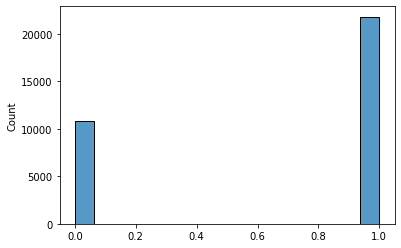

In [15]:
sns.histplot(X)

In [16]:
X.shape

(32561,)

In [17]:
X = X.reshape(-1,1)
X.shape

(32561, 1)

In [18]:
y = dataset['income'].values

In [20]:
bernoulli_naive_bayes = BernoulliNB()
bernoulli_naive_bayes.fit(X,y)
previsoes = bernoulli_naive_bayes.predict(X)

In [21]:
previsoes, y

(array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' <=50K'],
       dtype='<U6'),
 array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
       dtype=object))

In [22]:
accuracy_score(y, previsoes)

0.7591904425539756

### Multinomial

In [23]:
from sklearn.naive_bayes import MultinomialNB

In [24]:
dataset = pd.read_csv('../0_datasets/census.csv')
dataset.head()

,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [25]:
dataset['workclass'].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [26]:
from sklearn.preprocessing import LabelEncoder

In [28]:
workclass = LabelEncoder()
dataset['workclass'] = workclass.fit_transform(dataset['workclass'])

education = LabelEncoder()
dataset['education'] = education.fit_transform(dataset['education'])

marital_status = LabelEncoder()
dataset['marital-status'] = marital_status.fit_transform(dataset['marital-status'])

occupation = LabelEncoder()
dataset['occupation'] = occupation.fit_transform(dataset['occupation'])

relationship = LabelEncoder()
dataset['relationship'] = relationship.fit_transform(dataset['relationship'])

race = LabelEncoder()
dataset['race'] = race.fit_transform(dataset['race'])

native_country = LabelEncoder()
dataset['native-country'] = native_country.fit_transform(dataset['native-country'])

In [29]:
dataset.head()

,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country,income
0,39,7,77516,9,13,4,1,1,4,Male,2174,0,40,39,<=50K
1,50,6,83311,9,13,2,4,0,4,Male,0,0,13,39,<=50K
2,38,4,215646,11,9,0,6,1,4,Male,0,0,40,39,<=50K
3,53,4,234721,1,7,2,6,0,2,Male,0,0,40,39,<=50K
4,28,4,338409,9,13,2,10,5,2,Female,0,0,40,5,<=50K


In [31]:
X = dataset.iloc[:, [1,3,5,6,7,8,13]].values
X

array([[ 7,  9,  4, ...,  1,  4, 39],
       [ 6,  9,  2, ...,  0,  4, 39],
       [ 4, 11,  0, ...,  1,  4, 39],
       ...,
       [ 4, 11,  6, ...,  4,  4, 39],
       [ 4, 11,  4, ...,  3,  4, 39],
       [ 5, 11,  2, ...,  5,  4, 39]])

In [32]:
y = dataset['income'].values
y

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype=object)

In [34]:
multinomial_naive_bayes = MultinomialNB()
multinomial_naive_bayes.fit(X,y)
previsoes = multinomial_naive_bayes.predict(X)
previsoes

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' <=50K'],
      dtype='<U6')

In [38]:
accuracy_score(y, previsoes)

0.7485949448727005